In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch
from datetime import datetime
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
path = "../data/processed/combined_data.csv"
data = pd.read_csv(path)

In [14]:
print(data.head())
print(data.columns)
print(data.shape)

   lag_10  lag_30  rolling_std_6  rolling_mean_6      RH_1  rolling_mean_3  \
0    60.0    60.0      11.690452       63.333333  1.863478       60.000000   
1    60.0    60.0      11.690452       63.333333  1.634348       60.000000   
2    60.0    60.0      11.690452       63.333333  1.534580       56.666667   
3    50.0    60.0      11.690452       63.333333  1.475395       53.333333   
4    50.0    60.0      11.690452       63.333333  1.543034       53.333333   

   rolling_std_3  temp_diff  rolling_mean_12  rolling_std_12  Appliances  
0      10.000000  -0.610354        65.833333       14.354811          60  
1      10.000000  -0.610354        65.833333       14.354811          60  
2       5.773503  -0.610354        65.833333       14.354811          50  
3       5.773503  -0.610354        65.833333       14.354811          50  
4       5.773503  -0.610354        65.833333       14.354811          60  
Index(['lag_10', 'lag_30', 'rolling_std_6', 'rolling_mean_6', 'RH_1',
       'rol

# **Baseline Models**

In [15]:
X = data.drop('Appliances', axis=1)
y = data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train and 20% test

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (15788, 10)
Testing shape: (3947, 10)


## **Model 1 - Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate model
mse_linear = mean_squared_error(y_test, lr_predictions)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, lr_predictions)
r2_linear = r2_score(y_test, lr_predictions)

# Print results
print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}")

Linear Regression Performance:
Mean Squared Error (MSE): 1767.5940
Root Mean Squared Error (RMSE): 42.0428
Mean Absolute Error (MAE): 19.4382
R² Score: 0.8234


## **Model 2 - Random Forest Regression**

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Performance:
Mean Squared Error (MSE): 1292.0339
Root Mean Squared Error (RMSE): 35.9449
Mean Absolute Error (MAE): 13.2914
R² Score: 0.8709


## **Model 3 - Gradient Boosting Regressor**

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize model
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    random_state=42
)

# Train model
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print results
print("Gradient Boosting Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"R² Score: {r2_gbr:.4f}")

Gradient Boosting Regressor Performance:
Mean Squared Error (MSE): 1354.6611
Root Mean Squared Error (RMSE): 36.8057
Mean Absolute Error (MAE): 16.1105
R² Score: 0.8646


## **Comparing all three Baseline models**

In [19]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [mae_linear, mae_rf, mae_gbr],
    "RMSE": [rmse_linear, rmse_rf, rmse_gbr],
    "R2 Score": [r2_linear, r2_rf, r2_gbr]
})

print("\n Baseline Model Comparison:")
print(results)


 Baseline Model Comparison:
               Model        MAE       RMSE  R2 Score
0  Linear Regression  19.438225  42.042764  0.823366
1      Random Forest  13.291386  35.944873  0.870888
2  Gradient Boosting  16.110490  36.805721  0.864630


##### Among the evaluated baseline models, Random Forest achieved the best performance with the lowest MAE (13.29), lowest RMSE (35.94), and highest R² score (0.87). This indicates that ensemble tree-based methods are better suited for capturing nonlinear dependencies between lag features, rolling statistics, and environmental variables in energy consumption prediction. Therefore, Random Forest serves as a strong benchmark for comparison with deep learning models.

# **Deep Learning Models**

## **LSTM Model**

X_train shape: (15780, 10, 10)
y_train shape: (15780, 1)
X_test shape: (3945, 10, 10)
y_test shape: (3945, 1)


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,161 (125.63 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0077 - mae: 0.0476 - val_loss: 0.0054 - val_mae: 0.0329
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0066 - mae: 0.0424 - val_loss: 0.0047 - val_mae: 0.0398
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0055 - mae: 0.0381 - val_loss: 0.0040 - val_mae: 0.0295
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0051 - mae: 0.0363 - val_loss: 0.0035 - val_mae: 0.0277
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0048 - mae: 0.0351 - val_loss: 0.0035 - val_mae: 0.0304
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0046 - mae: 0.0339 - val_loss: 0.0033 - val_mae: 0.0245
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0045 - mae: 0.0332 - val_loss: 0.0032 - val_mae: 0.0254
Epoch 8/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0043 - mae: 0.0322 - val_loss: 0.0032 - val_mae: 0.0253
Epoch 9/100
444/444 ━━━━━━━━━━━━━━━━━━━

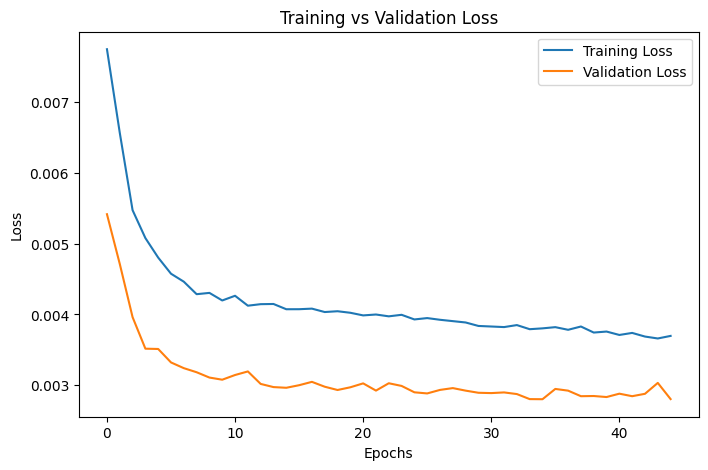

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM Model Performance:
Mean Absolute Error (MAE): 24.5910
Root Mean Squared Error (RMSE): 58.2054
R² Score: 0.5874


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Features and Target
feature_columns = [col for col in data.columns if col != 'Appliances']
X = data[feature_columns].values
y = data['Appliances'].values

# Scale Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1,1)
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

#Create Sequences for LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps=time_steps)

# Train-Test Split (80-20)
train_size = int(len(X_seq) * 0.8)
X_train_seq = X_seq[:train_size]
X_test_seq = X_seq[train_size:]

y_train_seq = y_seq[:train_size]
y_test_seq = y_seq[train_size:]

print("X_train shape:", X_train_seq.shape)
print("y_train shape:", y_train_seq.shape)
print("X_test shape:", X_test_seq.shape)
print("y_test shape:", y_test_seq.shape)

# Build LSTM Model
lstm_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.summary()

# Train LSTM Model with EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Plot Training & Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Make Predictions & Evaluate
y_pred_scaled = lstm_model.predict(X_test_seq).flatten()
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_true = y_scaler.inverse_transform(y_test_seq.reshape(-1,1)).flatten()

mae_lstm = mean_absolute_error(y_true, y_pred)
mse_lstm = mean_squared_error(y_true, y_pred)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_true, y_pred)

print("LSTM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")
print(f"R² Score: {r2_lstm:.4f}")

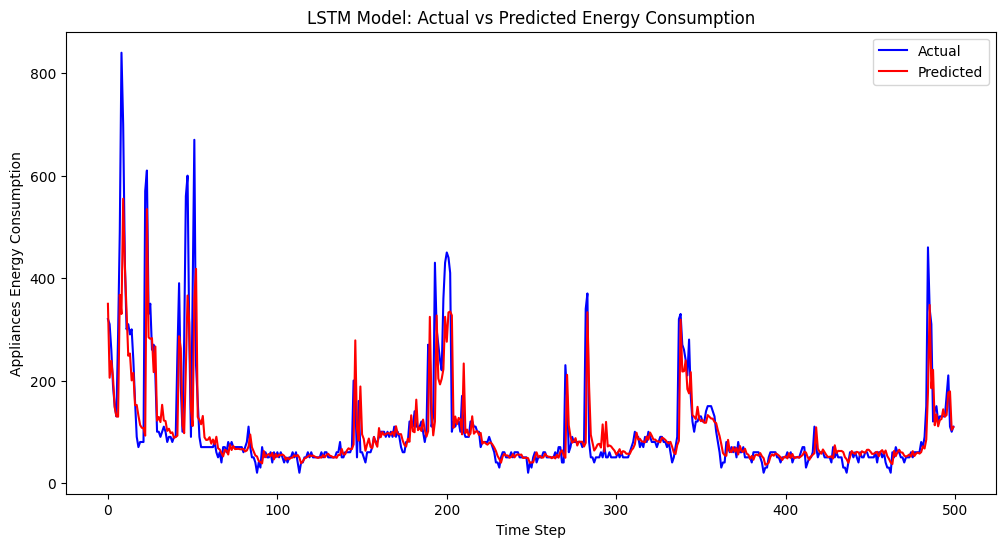

In [21]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_true[:500], label='Actual', color='blue')  # first 500 points for clarity
plt.plot(y_pred[:500], label='Predicted', color='red')
plt.title("LSTM Model: Actual vs Predicted Energy Consumption")
plt.xlabel("Time Step")
plt.ylabel("Appliances Energy Consumption")
plt.legend()
plt.show()

## **GRU Model**

c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 64)         │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,545 (95.88 KB)

 Trainable params: 24,545 (95.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0069 - mae: 0.0452 - val_loss: 0.0043 - val_mae: 0.0346
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0054 - mae: 0.0393 - val_loss: 0.0036 - val_mae: 0.0300
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0049 - mae: 0.0361 - val_loss: 0.0033 - val_mae: 0.0263
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0046 - mae: 0.0343 - val_loss: 0.0033 - val_mae: 0.0278
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0044 - mae: 0.0341 - val_loss: 0.0031 - val_mae: 0.0245
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0043 - mae: 0.0326 - val_loss: 0.0032 - val_mae: 0.0249
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0043 - mae: 0.0325 - val_loss: 0.0030 - val_mae: 0.0248
Epoch 8/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0042 - mae: 0.0319 - val_loss: 0.0031 - val_mae: 0.0277
Epoch 9/100
444/444 ━━━━━━━━━━━━━━━━━━━

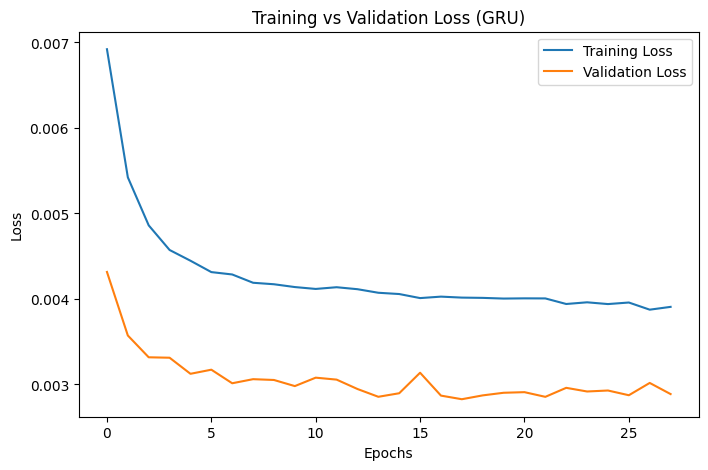

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
GRU Model Performance:
MAE: 26.1694
RMSE: 58.5865
R²: 0.5820


In [22]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Features and target
feature_columns = [col for col in data.columns if col != 'Appliances']
X = data[feature_columns].values
y = data['Appliances'].values.reshape(-1,1)

# Scale features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)


# Create sequences for G
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train-Test Split (80-20)
train_size = int(len(X_seq) * 0.8)
X_train = X_seq[:train_size]
X_test = X_seq[train_size:]
y_train = y_seq[:train_size]
y_test = y_seq[train_size:]

# Build GRU model
gru_model = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the GRU model
history = gru_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss (GRU)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Predictions & evaluation
y_pred_scaled = gru_model.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1,1)).flatten()

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("GRU Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

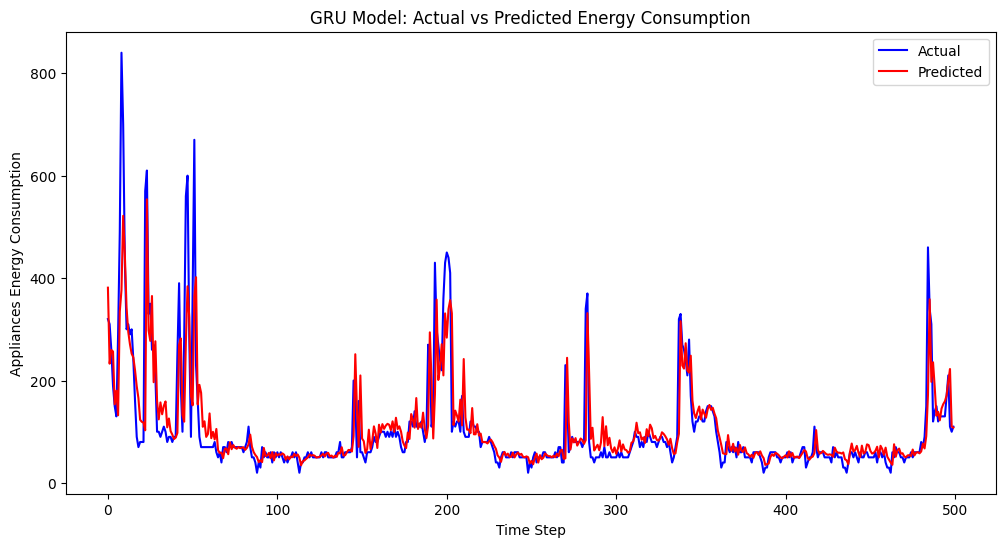

In [23]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_true[:500], label='Actual', color='blue')  # first 500 points for clarity
plt.plot(y_pred[:500], label='Predicted', color='red')
plt.title("GRU Model: Actual vs Predicted Energy Consumption")
plt.xlabel("Time Step")
plt.ylabel("Appliances Energy Consumption")
plt.legend()
plt.show()

## **CNN-LSTM Hybrid**

X_train shape: (15780, 10, 10)
y_train shape: (15780, 1)
X_test shape: (3945, 10, 10)
y_test shape: (3945, 1)


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,481 (142.50 KB)

 Trainable params: 36,481 (142.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0079 - mae: 0.0489 - val_loss: 0.0058 - val_mae: 0.0347
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0073 - mae: 0.0455 - val_loss: 0.0055 - val_mae: 0.0390
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0071 - mae: 0.0441 - val_loss: 0.0054 - val_mae: 0.0399
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0070 - mae: 0.0434 - val_loss: 0.0053 - val_mae: 0.0361
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0069 - mae: 0.0432 - val_loss: 0.0054 - val_mae: 0.0341
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0069 - mae: 0.0429 - val_loss: 0.0052 - val_mae: 0.0377
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0068 - mae: 0.0425 - val_loss: 0.0051 - val_mae: 0.0350
Epoch 8/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0067 - mae: 0.0423 - val_loss: 0.0051 - val_mae: 0.0332
Epoch 9/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

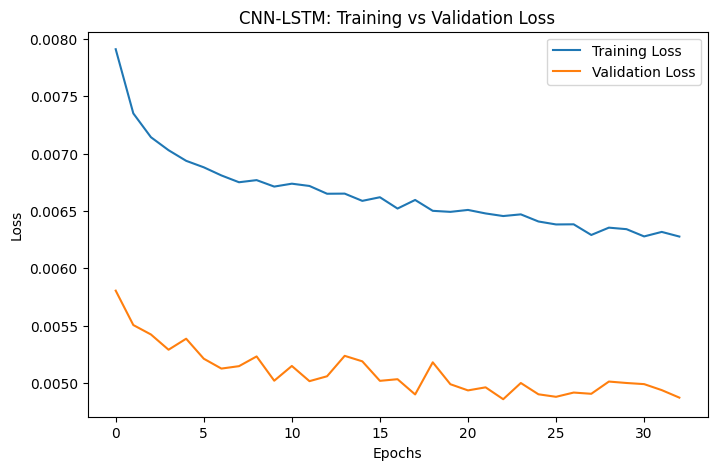

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

CNN-LSTM Model Performance:
MAE: 34.1563
RMSE: 74.8750
R² Score: 0.3173


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Features and Target
feature_columns = [col for col in data.columns if col != 'Appliances']
X = data[feature_columns].values
y = data['Appliances'].values

# Scale Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1,1)
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

# Create Sequences for LSTM/CNN-LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps=time_steps)

# Train-Test Split (80-20)
train_size = int(len(X_seq) * 0.8)
X_train_seq = X_seq[:train_size]
X_test_seq = X_seq[train_size:]

y_train_seq = y_seq[:train_size]
y_test_seq = y_seq[train_size:]

print("X_train shape:", X_train_seq.shape)
print("y_train shape:", y_train_seq.shape)
print("X_test shape:", X_test_seq.shape)
print("y_test shape:", y_test_seq.shape)

# Build CNN-LSTM Model
cnn_lstm = Sequential([
    # 1D Convolution
    Conv1D(filters=64,
           kernel_size=2,
           activation='relu',
           input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # LSTM layer
    LSTM(64),
    Dropout(0.2),

    # Dense layers
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
cnn_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_lstm.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history_cnn_lstm = cnn_lstm.fit(
    X_train_seq,
    y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Plot Training & Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history_cnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("CNN-LSTM: Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Make Predictions & Evaluate
y_pred_scaled = cnn_lstm.predict(X_test_seq).flatten()
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_true = y_scaler.inverse_transform(y_test_seq.reshape(-1,1)).flatten()

mae_cnn_lstm = mean_absolute_error(y_true, y_pred)
mse_cnn_lstm = mean_squared_error(y_true, y_pred)
rmse_cnn_lstm = np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_true, y_pred)

print("\nCNN-LSTM Model Performance:")
print(f"MAE: {mae_cnn_lstm:.4f}")
print(f"RMSE: {rmse_cnn_lstm:.4f}")
print(f"R² Score: {r2_cnn_lstm:.4f}")

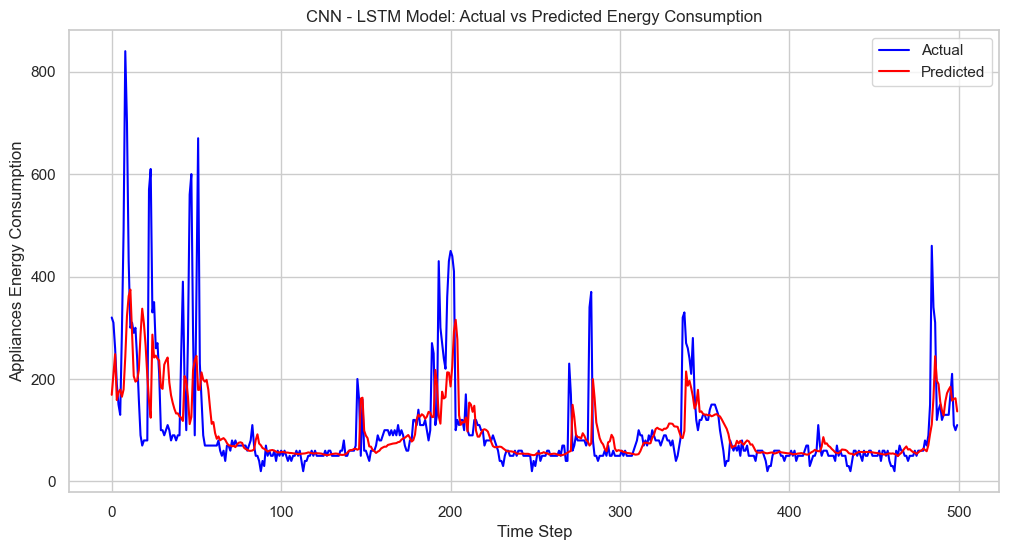

In [38]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_true[:500], label='Actual', color='blue')  # first 500 points for clarity
plt.plot(y_pred[:500], label='Predicted', color='red')
plt.title("CNN - LSTM Model: Actual vs Predicted Energy Consumption")
plt.xlabel("Time Step")
plt.ylabel("Appliances Energy Consumption")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Collect Metrics for All Models
model_metrics = {
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting",
        "LSTM",
        "GRU",
        "CNN-LSTM"
    ],
    "MAE": [
        mae_linear,       # Linear Regression
        mae_rf,           # Random Forest
        mae_gbr,          # Gradient Boosting
        mae_lstm,         # LSTM
        mae,              # GRU
        mae_cnn_lstm      # CNN-LSTM
    ],
    "RMSE": [
        np.sqrt(mse_linear),
        np.sqrt(mse_rf),
        np.sqrt(mse_gbr),
        rmse_lstm,
        rmse,
        rmse_cnn_lstm
    ],
    "R2 Score": [
        r2_linear,
        r2_rf,
        r2_gbr,
        r2_lstm,
        r2,
        r2_cnn_lstm
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Sort by R2 Score (optional)
metrics_df = metrics_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

# Display the table
print(metrics_df)

               Model        MAE       RMSE  R2 Score
0      Random Forest  13.291386  35.944873  0.870888
1  Gradient Boosting  16.110490  36.805721  0.864630
2  Linear Regression  19.438225  42.042764  0.823366
3               LSTM  24.591048  58.205370  0.587421
4                GRU  26.169441  58.586534  0.582000
5           CNN-LSTM  34.156331  74.875032  0.317261


C:\Users\User\AppData\Local\Temp\ipykernel_21800\803999532.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mae_values, y=models, palette="viridis")


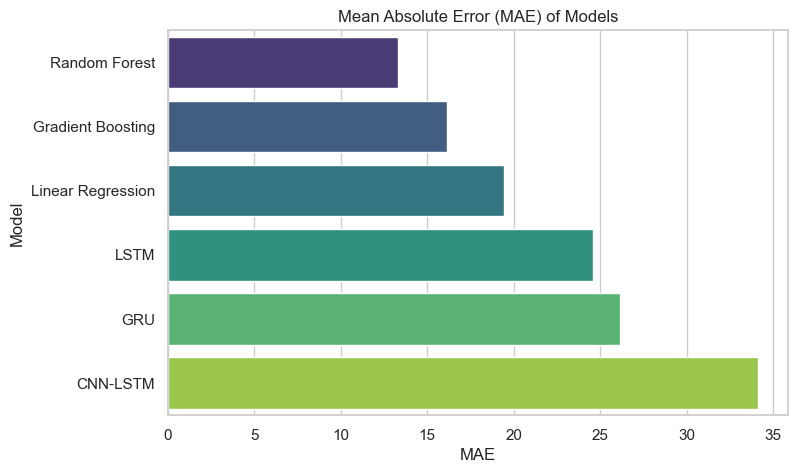

C:\Users\User\AppData\Local\Temp\ipykernel_21800\803999532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rmse_values, y=models, palette="magma")


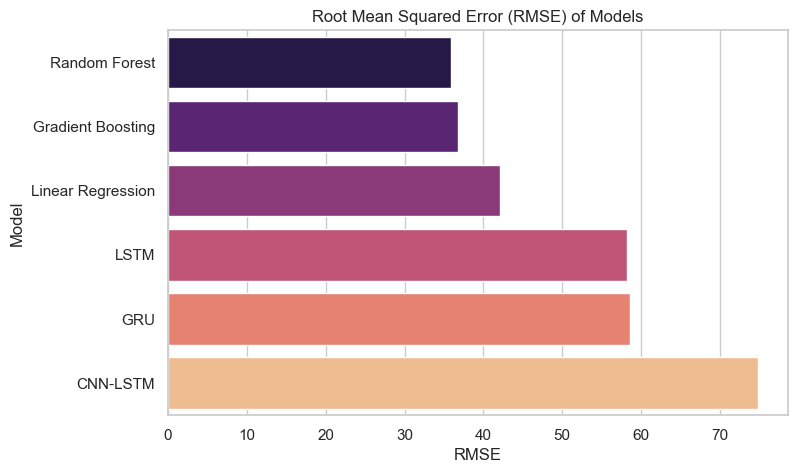

C:\Users\User\AppData\Local\Temp\ipykernel_21800\803999532.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r2_values, y=models, palette="coolwarm")


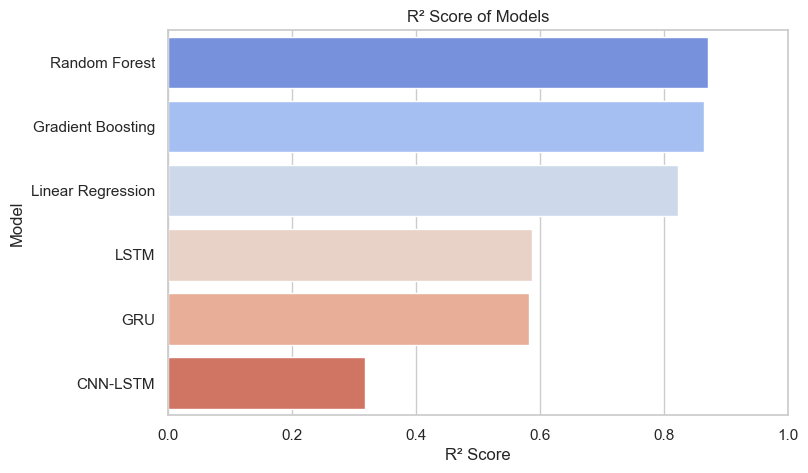

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Prepare data
models = metrics_df['Model']
mae_values = metrics_df['MAE']
rmse_values = metrics_df['RMSE']
r2_values = metrics_df['R2 Score']

plt.figure(figsize=(8,5))
sns.barplot(x=mae_values, y=models, palette="viridis")
plt.title("Mean Absolute Error (MAE) of Models")
plt.xlabel("MAE")
plt.ylabel("Model")
plt.show()

# Plot RMSE
plt.figure(figsize=(8,5))
sns.barplot(x=rmse_values, y=models, palette="magma")
plt.title("Root Mean Squared Error (RMSE) of Models")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()

# Plot R² Score
plt.figure(figsize=(8,5))
sns.barplot(x=r2_values, y=models, palette="coolwarm")
plt.title("R² Score of Models")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0,1)  # R² ranges from 0 to 1 for easier comparison
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Create a dictionary of results
results = {
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting",
        "LSTM",
        "GRU",
        "CNN-LSTM"
    ],
    "MAE": [
        mae_linear,       # Linear Regression
        mae_rf,           # Random Forest
        mae_gbr,          # Gradient Boosting
        mae_lstm,         # LSTM
        mae,              # GRU
        mae_cnn_lstm      # CNN-LSTM
    ],
    "MSE": [
        mse_linear,
        mse_rf,
        mse_gbr,
        mse_lstm,
        mse,
        mse_cnn_lstm
    ],
    "R2": [
        r2_linear,
        r2_rf,
        r2_gbr,
        r2_lstm,
        r2,
        r2_cnn_lstm
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Rank the models
results_df["MAE Rank"] = results_df["MAE"].rank()
results_df["MSE Rank"] = results_df["MSE"].rank()
results_df["R2 Rank"] = results_df["R2"].rank(ascending=False)

# Calculate average rank
results_df["Average Rank"] = results_df[["MAE Rank", "MSE Rank", "R2 Rank"]].mean(axis=1)

# Separate baseline and deep learning models
baseline_models = results_df.iloc[0:3]   # First 3 are baseline
deep_learning_models = results_df.iloc[3:]  # Last 3 are deep learning

# Find best model in each group
best_baseline = baseline_models.loc[baseline_models["Average Rank"].idxmin()]["Model"]
best_deep_learning = deep_learning_models.loc[deep_learning_models["Average Rank"].idxmin()]["Model"]

# Print results
print("Full Model Comparison:")
print(results_df)
print("\nBest Baseline Model:", best_baseline)
print("Best Deep Learning Model:", best_deep_learning)

Full Model Comparison:
               Model        MAE          MSE        R2  MAE Rank  MSE Rank  \
0  Linear Regression  19.438225  1767.593986  0.823366       3.0       3.0   
1      Random Forest  13.291386  1292.033907  0.870888       1.0       1.0   
2  Gradient Boosting  16.110490  1354.661062  0.864630       2.0       2.0   
3               LSTM  24.591048  3387.865096  0.587421       4.0       4.0   
4                GRU  26.169441  3432.381916  0.582000       5.0       5.0   
5           CNN-LSTM  34.156331  5606.270456  0.317261       6.0       6.0   

   R2 Rank  Average Rank  
0      3.0           3.0  
1      1.0           1.0  
2      2.0           2.0  
3      4.0           4.0  
4      5.0           5.0  
5      6.0           6.0  

Best Baseline Model: Random Forest
Best Deep Learning Model: LSTM


## **Optimization**

### Hyperparameter Technique

In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import itertools

# Prepare Data
feature_columns = [col for col in data.columns if col != 'Appliances']
X = data[feature_columns].values
y = data['Appliances'].values.reshape(-1,1)

# Scale features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Create sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train-test split
train_size = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]

# Create LSTM Model Function
def create_lstm_model(input_shape, dropout_rate=0.2, units_1=64, units_2=32, dense_units=16, learning_rate=0.001):
    model = Sequential([
        LSTM(units_1, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        LSTM(units_2, activation='tanh', return_sequences=False),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dense(1)  # Output
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mse'])
    return model

# Define Smaller Hyperparameter Grid (Faster)
param_grid = {
    'units_1': [64, 128],
    'units_2': [32, 64],
    'dense_units': [16],
    'dropout_rate': [0.2],
    'learning_rate': [0.001],
    'epochs': [10, 20],   # Lower epochs for search
    'batch_size': [32],   # Fixed batch size
}

keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# Manual Hyperparameter Search
best_mse = float('inf')
best_model = None
best_params = {}
results = []

for combo in combinations:
    print(f"Training with: {combo}")
    
    # Create model
    model = create_lstm_model(
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
        units_1=combo['units_1'],
        units_2=combo['units_2'],
        dense_units=combo['dense_units'],
        dropout_rate=combo['dropout_rate'],
        learning_rate=combo['learning_rate']
    )
    
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train model
    model.fit(
        X_train_seq, y_train_seq,
        validation_split=0.2,
        epochs=combo['epochs'],
        batch_size=combo['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Predict & inverse scale
    y_pred_scaled = model.predict(X_test_seq).flatten()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
    y_true = scaler_y.inverse_transform(y_test_seq.reshape(-1,1)).flatten()
    
    # Evaluate
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Save results
    results.append({**combo, 'MSE': mse, 'MAE': mae, 'R2': r2})
    
    # Track best model
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_params = combo
        print(f"New Best MSE: {mse:.4f} with params: {combo}")

# Results Summary
results_df = pd.DataFrame(results).sort_values(by='MSE')
print("\nTop 5 Hyperparameter Combinations:")
print(results_df.head())

print("\nBest Hyperparameters:")
print(best_params)

# best_model is ready for final training or predictions

Training with: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
New Best MSE: 3694.1166 with params: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}
Training with: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
New Best MSE: 3467.8537 with params: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}
Training with: {'units_1': 64, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units_1': 64, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
New Best MSE: 3437.3186 with params: {'units_1': 64, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}
Training with: {'units_1': 128, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units_1': 128, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units_1': 128, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units_1': 128, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


c:\Users\User\Desktop\Appliance_Energy_Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Top 5 Hyperparameter Combinations:
   units_1  units_2  dense_units  dropout_rate  learning_rate  epochs  \
3       64       64           16           0.2          0.001      20   
5      128       32           16           0.2          0.001      20   
1       64       32           16           0.2          0.001      20   
6      128       64           16           0.2          0.001      10   
7      128       64           16           0.2          0.001      20   

   batch_size          MSE        MAE        R2  
3          32  3437.318576  28.753451  0.581399  
5          32  3447.074650  26.858830  0.580210  
1          32  3467.853735  27.014550  0.577680  
6          32  3549.968922  26.103043  0.567680  
7          32  3550.047741  27.366729  0.567670  

Best Hyperparameters:
{'units_1': 64, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


### Early Stopping Technique

Epoch 1/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 3/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 6/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 9/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

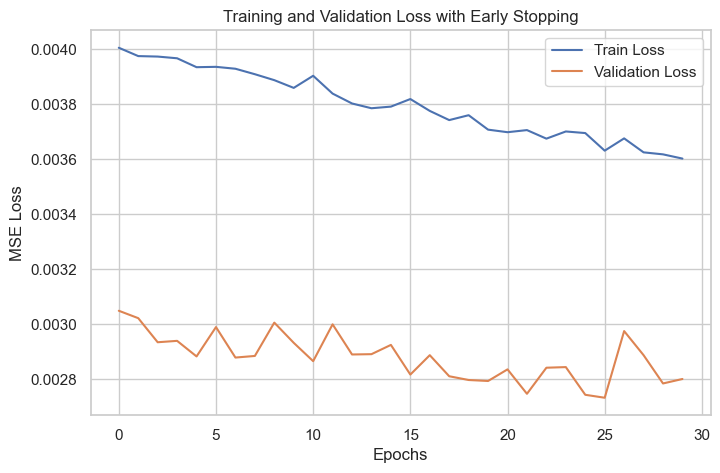

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE: 3391.8910
Test MAE: 25.0849
Test R2: 0.5869


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Early Stopping Setup
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitor validation loss
    patience=5,               # stop if no improvement for 5 epochs
    restore_best_weights=True # restore the best weights
)

# Train the Best Model with Early Stopping
finalized_history = best_model.fit(
    X_train_seq, y_train_seq,   # use sequence training data
    validation_split=0.1,       # 10% for validation
    epochs=30,                   # max epochs
    batch_size=32,               # batch size
    callbacks=[early_stopping],
    verbose=1
)

# Plot Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(finalized_history.history['loss'], label='Train Loss')
plt.plot(finalized_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss with Early Stopping')
plt.legend()
plt.show()

# Evaluate on Test Set
y_pred_scaled = best_model.predict(X_test_seq).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_true = scaler_y.inverse_transform(y_test_seq.reshape(-1,1)).flatten()

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")

### Comparison between, Before and After Optimizing the LSTM model

In [43]:
# Comparison with Original vs Optimized Model
print("\nComparison with Original Model:")
print(f"Original Model - MSE: {mse_lstm:.4f}")
print(f"Original Model - MAE: {mae_lstm:.4f}")
print(f"Original Model - R-square: {r2_lstm:.4f}")

print(f"\nOptimized Model - MSE: {mse_final:.4f}")
print(f"Optimized Model - MAE: {mae_final:.4f}")
print(f"Optimized Model - R-square: {r2_final:.4f}")

# Improvement Calculation
print("\nOptimized Model Improvement:")
print(f"MSE Improvement: {mse_lstm - mse_final:.4f}")
print(f"MAE Improvement: {mae_lstm - mae_final:.4f}")
print(f"R2 Improvement: {r2_final - r2_lstm:.4f}")


Comparison with Original Model:
Original Model - MSE: 3387.8651
Original Model - MAE: 24.5910
Original Model - R-square: 0.5874

Optimized Model - MSE: 3391.8910
Optimized Model - MAE: 25.0849
Optimized Model - R-square: 0.5869

Optimized Model Improvement:
MSE Improvement: -4.0259
MAE Improvement: -0.4938
R2 Improvement: -0.0005


# **Saving all models**

In [45]:
import os
import joblib

target_dir = "../models/"
os.makedirs(target_dir, exist_ok=True)

# Save traditional ML baseline models
try:
    joblib.dump(lr_model, os.path.join(target_dir, 'linear_regression_model.pkl'))
    print("Saved Linear Regression model.")
except NameError:
    print("lr_model not found, skipping...")

try:
    joblib.dump(rf_model, os.path.join(target_dir, 'random_forest_model.pkl'))
    print("Saved Random Forest model.")
except NameError:
    print("rf_model not found, skipping...")

try:
    joblib.dump(gbr_model, os.path.join(target_dir, 'gradient_booster_model.pkl'))
    print("Saved Gradient Boosting model.")
except NameError:
    print("gbr_model not found, skipping...")

# Save deep learning baseline models
# original_model: your baseline LSTM before tuning
try:
    original_model.save(os.path.join(target_dir, "lstm_original_model.keras"))
    original_model.save(os.path.join(target_dir, "lstm_original_model.h5"))
    print("Saved Original LSTM model.")
except NameError:
    print("original_model not found, skipping...")

# If you have other deep learning models like GRU or CNN-LSTM
try:
    gru_model.save(os.path.join(target_dir, "gru_model.keras"))
    print("Saved GRU model.")
except NameError:
    print("gru_model not found, skipping...")

try:
    cnn_lstm_model.save(os.path.join(target_dir, "cnn_lstm_model.keras"))
    print("Saved CNN-LSTM model.")
except NameError:
    print("cnn_lstm_model not found, skipping...")

# Save best optimized LSTM model
try:
    best_model.save(os.path.join(target_dir, "lstm_optimized_model.keras"))
    best_model.save(os.path.join(target_dir, "lstm_optimized_model.h5"))
    print("Saved Optimized LSTM model.")
except NameError:
    print("best_model not found, skipping...")

# Save best model as joblib (for consistency)
try:
    joblib.dump(best_model, os.path.join(target_dir, 'optimized_model.pkl'))
    print("Saved Optimized model as joblib.")
except Exception:
    print("Cannot save Keras model with joblib, skipped.")

Saved Linear Regression model.
Saved Random Forest model.
Saved Gradient Boosting model.
original_model not found, skipping...
Saved GRU model.
cnn_lstm_model not found, skipping...


Saved Optimized LSTM model.
Saved Optimized model as joblib.
